# Module 4 Report
<code>Issue: 1 Rev 0 (28 June 2023)</code>

## Structure of the report
This report provides the analysis and conclusions for the Module 4 assignment. The content is divided in two main sections.

First, we cover the analysis of the import and analysis of the provided data. The analysis is done in the same order as the assignment, with one part per main requirements:
- Part 1: Local Government Area (LGA) Summary
- Part 2: School Summary
- Part 3: Highest-Performing Schools (by % Overall Passing)
- Part 4: Lowest-Performing Schools (by % Overall Passing)
- Part 5: Maths Scores by Year
- Part 6: Reading Scores by Year
- Part 7: Scores by School Spending
- Part 8: Scores by School Size
- Part 9: Scores by School Type

In the second and last section, we provide our conclusions based on the data we extracted.

This structure hopefully allows to clearly separate the coding and extraction of the main metrics from the conclusion we draw from them. For clarity, each section about Part 1-9 includes a subsection called "Solution to Part" that provides all the required data from the assignment instructions. 

## 1. Analysis as per assignment instructions

### Preparation: Importing and checking the data
Using the code provided with the starter file, we first import the data into a pandas dataframe. We print the head() of the dataframe to get familiar with the data and then print the count() to make sure the dataset is complete (no missing data).

In [1]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path

# File to Load
school_data_to_load = Path("Resources/schools_complete.csv")
student_data_to_load = Path("Resources/students_complete.csv")

# Read School and Student Data File and store into Pandas DataFrames
school_data = pd.read_csv(school_data_to_load)
student_data = pd.read_csv(student_data_to_load)

# Combine the data into a single dataset.  
school_data_complete = pd.merge(student_data, school_data, how="left", on=["school_name", "school_name"])

# Print head() to familiarise ourselves with the data
school_data_complete.head()

,Student ID,student_name,gender,year,school_name,reading_score,maths_score,School ID,type,size,budget
0,0,Paul Bradley,M,9,Huang High School,96,94,0,Government,2917,1910635
1,1,Victor Smith,M,12,Huang High School,90,43,0,Government,2917,1910635
2,2,Kevin Rodriguez,M,12,Huang High School,41,76,0,Government,2917,1910635
3,3,Richard Scott,M,12,Huang High School,89,86,0,Government,2917,1910635
4,4,Bonnie Ray,F,9,Huang High School,87,69,0,Government,2917,1910635


In [2]:
# Print count to verify the dataset is complete
school_data_complete.count()

Student ID       39170
student_name     39170
gender           39170
year             39170
school_name      39170
reading_score    39170
maths_score      39170
School ID        39170
type             39170
size             39170
budget           39170
dtype: int64

As it seems like the dataset is complete, we can proceed with the government area summary. If any issue arise, it will be fixed subsequentially.

### Part 1: Local Government Area Summary


#### Step-by-step solving of Part 1
This subsection can be skipped if you want to go directly to the solution of this part of the problem (see next subsection.)

In [3]:
# Calculate the total number of schools
total_num_of_schools = school_data_complete['school_name'].nunique()
print(f"Number of schools: {total_num_of_schools}")

# Calculate the total number of students
# NOTE: the nunique result for student_name return a different number
total_num_of_students = school_data_complete['Student ID'].nunique()
print(f"Number of students: {total_num_of_students} (based on Student ID)")
print(f"Number of students: {school_data_complete['student_name'].nunique()} (based on Student Name)")

# Calculate the total budget
total_budget = school_data_complete['budget'].unique().sum()
print(f"Total budget: {total_budget}")

# Calculate the average maths score
average_maths_score = school_data_complete['maths_score'].mean()
print(f"Average maths score: {average_maths_score}")

# Calculate the average reading score
average_reading_score = school_data_complete['reading_score'].mean()
print(f"Average reading score: {average_reading_score}")

# Calculate the percentage of students with a passing maths score (50 or greater)
percent_passing_maths = 100*school_data_complete.loc[school_data_complete['maths_score']>=50,:]['Student ID'].nunique()/school_data_complete['Student ID'].nunique()
print(f"Percent of passing math student: {percent_passing_maths}")

# Calculate the percentage of students with a passing reading score (50 or greater)
percent_passing_reading = 100*school_data_complete.loc[school_data_complete['reading_score']>=50,:]['Student ID'].nunique()/school_data_complete['Student ID'].nunique()
print(f"Percent of passing reading student: {percent_passing_reading}")

# Calculate the percentage of students who passed maths **and** reading (% Overall Passing)
percent_passing_overall = 100*school_data_complete.loc[\
    (school_data_complete['maths_score']>=50) & (school_data_complete['reading_score']>=50),:]\
        ['Student ID'].nunique()/school_data_complete['Student ID'].nunique()
print(f"Percent of overall passing student: {percent_passing_overall}")

Number of schools: 15
Number of students: 39170 (based on Student ID)
Number of students: 32655 (based on Student Name)
Total budget: 24649428
Average maths score: 70.33819249425581
Average reading score: 69.98013786060761
Percent of passing math student: 86.07863160582077
Percent of passing reading student: 84.42685728874139
Percent of overall passing student: 72.80827163645647


The data above are aligned with the provided results and can now be placed in a dataframe and formatted (see next step.)

**Note**: the number of unique students based on Student ID (primary key) is larger than the number based on their names. We can therefore expect that many students have the same name or that the same students are enrolled with different schools with different student ID. This is only noted at this stage and not explored further. 

In [4]:
# Create a dataframe to hold the above results
summary_df_noformat = pd.DataFrame({"Total Schools":[total_num_of_schools],
                           "Total Students":[total_num_of_students],
                           "Total Budget":[total_budget],
                           "Average Maths Score":[average_maths_score],
                           "Average Reading Score":[average_reading_score],
                           "% Passing Maths":[percent_passing_maths],
                           "% Passing Reading":[percent_passing_reading],
                           "% Overall Passing":[percent_passing_overall]})

# Display the DataFrame without formatting
summary_df_noformat

,Total Schools,Total Students,Total Budget,Average Maths Score,Average Reading Score,% Passing Maths,% Passing Reading,% Overall Passing
0,15,39170,24649428,70.338192,69.980138,86.078632,84.426857,72.808272


#### Solution to Part 1
The table below provides the solution to Part 1 of the assignment (Local Government Area Summary)

In [5]:
# The data without formatting will be kept in summary_df_noformat in case it is needed later
# A new DataFrame is created as a copy of summary_df_noformat for the data to be formatted
area_summary = summary_df_noformat[summary_df_noformat.columns]

# Give the displayed data cleaner formatting
area_summary["Total Students"] = summary_df_noformat["Total Students"].map("{:,}".format)
area_summary["Total Budget"] = summary_df_noformat["Total Budget"].map("$ {:,.2f}".format)
area_summary["Average Maths Score"] = summary_df_noformat["Average Maths Score"].map("{:,.2f}".format)
area_summary["Average Reading Score"] = summary_df_noformat["Average Reading Score"].map("{:,.2f}".format)
area_summary["% Passing Maths"] = summary_df_noformat["% Passing Maths"].map("{:,.2f}%".format)
area_summary["% Passing Reading"] = summary_df_noformat["% Passing Reading"].map("{:,.2f}%".format)
area_summary["% Overall Passing"] = summary_df_noformat["% Overall Passing"].map("{:,.2f}%".format)

# Display the DataFrame with the formatting
area_summary

,Total Schools,Total Students,Total Budget,Average Maths Score,Average Reading Score,% Passing Maths,% Passing Reading,% Overall Passing
0,15,"39,170","$ 24,649,428.00",70.34,69.98,86.08%,84.43%,72.81%


### Part 2: School Summary

#### Step-by-step solving of Part 2
This subsection can be skipped if you want to go directly to the solution of this part of the problem (see next subsection.)

In [6]:
# Group data by school name
school_summary_df = school_data_complete.groupby('school_name')

# Display the DataFrame based on the count() data function (used only to inspect the data)
school_summary_df.count().head(total_num_of_schools)

,Student ID,student_name,gender,year,reading_score,maths_score,School ID,type,size,budget
school_name,,,,,,,,,,
Bailey High School,4976,4976,4976,4976,4976,4976,4976,4976,4976,4976
Cabrera High School,1858,1858,1858,1858,1858,1858,1858,1858,1858,1858
Figueroa High School,2949,2949,2949,2949,2949,2949,2949,2949,2949,2949
Ford High School,2739,2739,2739,2739,2739,2739,2739,2739,2739,2739
Griffin High School,1468,1468,1468,1468,1468,1468,1468,1468,1468,1468
Hernandez High School,4635,4635,4635,4635,4635,4635,4635,4635,4635,4635
Holden High School,427,427,427,427,427,427,427,427,427,427
Huang High School,2917,2917,2917,2917,2917,2917,2917,2917,2917,2917
Johnson High School,4761,4761,4761,4761,4761,4761,4761,4761,4761,4761


In [7]:
# Get the school type for each school
# NOTE: This is a bit of a hack... I use min() on the column type because I know there is only one item and
# I don't want school_type to be a list with a single item (which I would get with .unique())
# I'm applying min() on a list of string which has a single item. This is not very elegant but it works...
school_type = school_summary_df['type'].min()
school_type

school_name
Bailey High School        Government
Cabrera High School      Independent
Figueroa High School      Government
Ford High School          Government
Griffin High School      Independent
Hernandez High School     Government
Holden High School       Independent
Huang High School         Government
Johnson High School       Government
Pena High School         Independent
Rodriguez High School     Government
Shelton High School      Independent
Thomas High School       Independent
Wilson High School       Independent
Wright High School       Independent
Name: type, dtype: object

In [8]:
# Get the number of students per school by counting the student names
school_students = school_summary_df['student_name'].count()
school_students

school_name
Bailey High School       4976
Cabrera High School      1858
Figueroa High School     2949
Ford High School         2739
Griffin High School      1468
Hernandez High School    4635
Holden High School        427
Huang High School        2917
Johnson High School      4761
Pena High School          962
Rodriguez High School    3999
Shelton High School      1761
Thomas High School       1635
Wilson High School       2283
Wright High School       1800
Name: student_name, dtype: int64

In [9]:
# Get the total budget per school by looking for the unique value of budget for each school
school_budget = school_summary_df['budget'].unique()
school_budget

school_name
Bailey High School       [3124928]
Cabrera High School      [1081356]
Figueroa High School     [1884411]
Ford High School         [1763916]
Griffin High School       [917500]
Hernandez High School    [3022020]
Holden High School        [248087]
Huang High School        [1910635]
Johnson High School      [3094650]
Pena High School          [585858]
Rodriguez High School    [2547363]
Shelton High School      [1056600]
Thomas High School       [1043130]
Wilson High School       [1319574]
Wright High School       [1049400]
Name: budget, dtype: object

In [10]:
# Calculate the budget per student for each school
school_budget_per_student = school_budget/school_students
school_budget_per_student

school_name
Bailey High School       [628.0]
Cabrera High School      [582.0]
Figueroa High School     [639.0]
Ford High School         [644.0]
Griffin High School      [625.0]
Hernandez High School    [652.0]
Holden High School       [581.0]
Huang High School        [655.0]
Johnson High School      [650.0]
Pena High School         [609.0]
Rodriguez High School    [637.0]
Shelton High School      [600.0]
Thomas High School       [638.0]
Wilson High School       [578.0]
Wright High School       [583.0]
dtype: object

In [11]:
# Get the average maths score for each school by using the mean() function on the maths_score column
school_avg_math = school_summary_df['maths_score'].mean()
school_avg_math

school_name
Bailey High School       72.352894
Cabrera High School      71.657158
Figueroa High School     68.698542
Ford High School         69.091274
Griffin High School      71.788147
Hernandez High School    68.874865
Holden High School       72.583138
Huang High School        68.935207
Johnson High School      68.843100
Pena High School         72.088358
Rodriguez High School    72.047762
Shelton High School      72.034072
Thomas High School       69.581651
Wilson High School       69.170828
Wright High School       72.047222
Name: maths_score, dtype: float64

In [12]:
# Get the average reading score for each school by using the mean() function on the reading_score column
school_avg_read = school_summary_df['reading_score'].mean()
school_avg_read

school_name
Bailey High School       71.008842
Cabrera High School      71.359526
Figueroa High School     69.077993
Ford High School         69.572472
Griffin High School      71.245232
Hernandez High School    69.186408
Holden High School       71.660422
Huang High School        68.910525
Johnson High School      69.039277
Pena High School         71.613306
Rodriguez High School    70.935984
Shelton High School      70.257808
Thomas High School       69.768807
Wilson High School       68.876916
Wright High School       70.969444
Name: reading_score, dtype: float64

In [13]:
# Get the % of passing maths students per school

# STEP 1: get the total count of students per school
total_number_of_entries_maths = school_summary_df['maths_score'].count()

# STEP 2: get the count of passing maths students per school
# Filter out the non-passing maths student in the original dataframe using loc on maths_score >= 50
# Count the values per school names -> this returns the number of passing students per school
school_passing_maths = school_data_complete.loc[school_data_complete['maths_score']>=50,:].value_counts('school_name')

# STEP 3: divide the number of students with grade >=50 by the total number of entries
school_percent_passing_maths = 100* school_passing_maths / total_number_of_entries_maths

# Display the results
school_percent_passing_maths

school_name
Bailey High School       91.639871
Cabrera High School      90.850377
Figueroa High School     81.654798
Ford High School         82.438846
Griffin High School      91.212534
Hernandez High School    80.949299
Holden High School       89.929742
Huang High School        81.693521
Johnson High School      82.062592
Pena High School         91.683992
Rodriguez High School    90.797699
Shelton High School      91.538898
Thomas High School       83.853211
Wilson High School       82.785808
Wright High School       91.777778
dtype: float64

In [14]:
# Get the % of passing reading students per school

# STEP 1: get the total count of students per school
total_number_of_entries_read = school_summary_df['reading_score'].count()

# STEP 2: get the count of passing reading students per school
# Filter out the non-passing maths student in the original dataframe using loc on reading_score >= 50
# Count the values per school names -> this returns the number of passing students per school
school_passing_read = school_data_complete.loc[school_data_complete['reading_score']>=50,:].value_counts('school_name')

# STEP 3: divide the number of students with grade >=50 by the total number of entries
school_percent_passing_reading = 100* school_passing_read / total_number_of_entries_read

# Display the results
school_percent_passing_reading

school_name
Bailey High School       87.379421
Cabrera High School      89.074273
Figueroa High School     82.807731
Ford High School         82.219788
Griffin High School      88.487738
Hernandez High School    81.877023
Holden High School       88.524590
Huang High School        81.453548
Johnson High School      81.978576
Pena High School         86.590437
Rodriguez High School    87.396849
Shelton High School      86.712095
Thomas High School       82.629969
Wilson High School       81.296540
Wright High School       86.666667
dtype: float64

In [15]:
# Get the % of overall passing students per school

# STEP 1: get the total count of students per school
total_number_of_entries = school_summary_df['student_name'].count()

# STEP 2: get the count of passing maths students per school
# Filter out the non-passing maths student in the original dataframe using loc on maths_score >= 50 AND reading_score >= 50
# Count the values per school names -> this returns the number of passing students per school
school_passing_overall = school_data_complete.loc[(school_data_complete['maths_score']>=50) & (school_data_complete['reading_score']>=50),:].value_counts('school_name')

# STEP 3: divide the number of students with grade >=50 by the total number of entries
school_percent_passing_overall = 100* school_passing_overall / total_number_of_entries

# Display the results
school_percent_passing_overall

school_name
Bailey High School       80.084405
Cabrera High School      80.785791
Figueroa High School     67.650051
Ford High School         67.469880
Griffin High School      81.335150
Hernandez High School    66.364617
Holden High School       78.922717
Huang High School        66.712376
Johnson High School      67.191766
Pena High School         79.209979
Rodriguez High School    79.419855
Shelton High School      78.875639
Thomas High School       69.480122
Wilson High School       67.455103
Wright High School       79.722222
dtype: float64

In [16]:
# A new DataFrame is created with the data from the cells above
school_summary_table = pd.DataFrame({"School Type": school_type,
                                    "Total Student": school_students,
                                    "Total School Budget": school_budget,
                                    "Per Student Budget": school_budget_per_student,
                                    "Average Maths Score": school_avg_math,
                                    "Average Reading Score": school_avg_read,
                                    "% Passing Maths": school_percent_passing_maths,
                                    "% Passing Reading": school_percent_passing_reading,
                                    "% Overall Passing": school_percent_passing_overall})

# Convert the data to the right format:
# - school type to string
# - school budget as float
# - per student budget as float
school_summary_table = school_summary_table.astype({"School Type":"string",
                                                    "Total School Budget":"float",
                                                    "Per Student Budget":"float"})

school_summary_table

,School Type,Total Student,Total School Budget,Per Student Budget,Average Maths Score,Average Reading Score,% Passing Maths,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Bailey High School,Government,4976,3124928.0,628.0,72.352894,71.008842,91.639871,87.379421,80.084405
Cabrera High School,Independent,1858,1081356.0,582.0,71.657158,71.359526,90.850377,89.074273,80.785791
Figueroa High School,Government,2949,1884411.0,639.0,68.698542,69.077993,81.654798,82.807731,67.650051
Ford High School,Government,2739,1763916.0,644.0,69.091274,69.572472,82.438846,82.219788,67.469880
Griffin High School,Independent,1468,917500.0,625.0,71.788147,71.245232,91.212534,88.487738,81.335150
Hernandez High School,Government,4635,3022020.0,652.0,68.874865,69.186408,80.949299,81.877023,66.364617
Holden High School,Independent,427,248087.0,581.0,72.583138,71.660422,89.929742,88.524590,78.922717
Huang High School,Government,2917,1910635.0,655.0,68.935207,68.910525,81.693521,81.453548,66.712376
Johnson High School,Government,4761,3094650.0,650.0,68.843100,69.039277,82.062592,81.978576,67.191766


#### Solution to Part 2
The table below provides the solution to Part 2 of the assignment (School Summary)

In [17]:
# Creating a new DataFrame to which the formatting can be applied
per_school_summary = school_summary_table[school_summary_table.columns]

# Adding formatting for budget and budget per student
per_school_summary['Total School Budget'] = school_summary_table['Total School Budget'].map("${:,.2f}".format)
per_school_summary['Per Student Budget'] = school_summary_table['Per Student Budget'].map("${:,.2f}".format)

# Display table
per_school_summary

,School Type,Total Student,Total School Budget,Per Student Budget,Average Maths Score,Average Reading Score,% Passing Maths,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Bailey High School,Government,4976,"$3,124,928.00",$628.00,72.352894,71.008842,91.639871,87.379421,80.084405
Cabrera High School,Independent,1858,"$1,081,356.00",$582.00,71.657158,71.359526,90.850377,89.074273,80.785791
Figueroa High School,Government,2949,"$1,884,411.00",$639.00,68.698542,69.077993,81.654798,82.807731,67.650051
Ford High School,Government,2739,"$1,763,916.00",$644.00,69.091274,69.572472,82.438846,82.219788,67.469880
Griffin High School,Independent,1468,"$917,500.00",$625.00,71.788147,71.245232,91.212534,88.487738,81.335150
Hernandez High School,Government,4635,"$3,022,020.00",$652.00,68.874865,69.186408,80.949299,81.877023,66.364617
Holden High School,Independent,427,"$248,087.00",$581.00,72.583138,71.660422,89.929742,88.524590,78.922717
Huang High School,Government,2917,"$1,910,635.00",$655.00,68.935207,68.910525,81.693521,81.453548,66.712376
Johnson High School,Government,4761,"$3,094,650.00",$650.00,68.843100,69.039277,82.062592,81.978576,67.191766


### Part 3: Top Performing Schools (By % Overall Passing)

#### Solution to Part 3
The table below provides the solution to Part 3 of the assignment (Highest-Performing Schools by Percentage of Overall Passing)

In [18]:
# Sort and display the top five performing schools by % overall passing.
top_schools = per_school_summary.sort_values('% Overall Passing', ascending=False)
top_schools.head()

,School Type,Total Student,Total School Budget,Per Student Budget,Average Maths Score,Average Reading Score,% Passing Maths,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Griffin High School,Independent,1468,"$917,500.00",$625.00,71.788147,71.245232,91.212534,88.487738,81.335150
Cabrera High School,Independent,1858,"$1,081,356.00",$582.00,71.657158,71.359526,90.850377,89.074273,80.785791
Bailey High School,Government,4976,"$3,124,928.00",$628.00,72.352894,71.008842,91.639871,87.379421,80.084405
Wright High School,Independent,1800,"$1,049,400.00",$583.00,72.047222,70.969444,91.777778,86.666667,79.722222
Rodriguez High School,Government,3999,"$2,547,363.00",$637.00,72.047762,70.935984,90.797699,87.396849,79.419855


### Part 4: Bottom Performing Schools (By % Overall Passing)

#### Solution to Part 4
The table below provides the solution to Part 4 of the assignment (Lowest-Performing Schools by Percentage of Overall Passing)

In [19]:
# Sort and display the five worst-performing schools by % overall passing.
# NOTE: the ascending argument is optional as it default to 'True', I however prefer to make it explicit
bottom_schools = per_school_summary.sort_values('% Overall Passing', ascending=True)
bottom_schools.head()

,School Type,Total Student,Total School Budget,Per Student Budget,Average Maths Score,Average Reading Score,% Passing Maths,% Passing Reading,% Overall Passing
school_name,,,,,,,,,
Hernandez High School,Government,4635,"$3,022,020.00",$652.00,68.874865,69.186408,80.949299,81.877023,66.364617
Huang High School,Government,2917,"$1,910,635.00",$655.00,68.935207,68.910525,81.693521,81.453548,66.712376
Johnson High School,Government,4761,"$3,094,650.00",$650.00,68.843100,69.039277,82.062592,81.978576,67.191766
Wilson High School,Independent,2283,"$1,319,574.00",$578.00,69.170828,68.876916,82.785808,81.296540,67.455103
Ford High School,Government,2739,"$1,763,916.00",$644.00,69.091274,69.572472,82.438846,82.219788,67.469880


### Part 5: Maths Scores by Year

#### Solution to Part 5
The table below provides the solution to Part 5 of the assignment (Maths Scores by Year)

In [20]:
# Create a pandas series for each year.
year_9_df = school_data_complete.loc[school_data_complete['year']==9,:]
year_10_df = school_data_complete.loc[school_data_complete['year']==10,:]
year_11_df = school_data_complete.loc[school_data_complete['year']==11,:]
year_12_df = school_data_complete.loc[school_data_complete['year']==12,:]

# Group each series by school and calculate the average maths score
year_9_school_df = year_9_df.groupby('school_name').mean(numeric_only=True)['maths_score']
year_10_school_df = year_10_df.groupby('school_name').mean(numeric_only=True)['maths_score']
year_11_school_df = year_11_df.groupby('school_name').mean(numeric_only=True)['maths_score']
year_12_school_df = year_12_df.groupby('school_name').mean(numeric_only=True)['maths_score']

# Combine the series into a dataframe
maths_scores_by_year = pd.DataFrame({"Year 9":year_9_school_df,
                                    "Year 10":year_10_school_df,
                                    "Year 11":year_11_school_df,
                                    "Year 12":year_12_school_df})

maths_scores_by_year

,Year 9,Year 10,Year 11,Year 12
school_name,,,,
Bailey High School,72.493827,71.897498,72.374900,72.675097
Cabrera High School,72.321970,72.437768,71.008299,70.604712
Figueroa High School,68.477804,68.331586,68.811001,69.325282
Ford High School,69.021609,69.387006,69.248862,68.617811
Griffin High School,72.789731,71.093596,71.692521,71.469178
Hernandez High School,68.586831,68.867156,69.154412,68.985075
Holden High School,70.543307,75.105263,71.640777,73.409639
Huang High School,69.081754,68.533246,69.431345,68.639316
Johnson High School,69.469286,67.990220,68.637730,69.287393


### Part 6: Reading Score by Year

#### Solution to Part 6
The table below provides the solution to Part 6 of the assignment (Reading Scores by Year)

In [21]:
# Create a pandas series for each year
# NOTE: this step is performed again for completeness sake but the same year_XX_df DataFrames could be resued
year_9_df = school_data_complete.loc[school_data_complete['year']==9,:]
year_10_df = school_data_complete.loc[school_data_complete['year']==10,:]
year_11_df = school_data_complete.loc[school_data_complete['year']==11,:]
year_12_df = school_data_complete.loc[school_data_complete['year']==12,:]

# Group each series by school and calculate the average maths score
year_9_school_df = year_9_df.groupby('school_name').mean(numeric_only=True)['reading_score']
year_10_school_df = year_10_df.groupby('school_name').mean(numeric_only=True)['reading_score']
year_11_school_df = year_11_df.groupby('school_name').mean(numeric_only=True)['reading_score']
year_12_school_df = year_12_df.groupby('school_name').mean(numeric_only=True)['reading_score']

# Combine the series into a dataframe
reading_scores_by_year = pd.DataFrame({"Year 9":year_9_school_df,
                                        "Year 10":year_10_school_df,
                                        "Year 11":year_11_school_df,
                                        "Year 12":year_12_school_df})

reading_scores_by_year

,Year 9,Year 10,Year 11,Year 12
school_name,,,,
Bailey High School,70.901920,70.848265,70.317346,72.195525
Cabrera High School,71.172348,71.328326,71.201245,71.856021
Figueroa High School,70.261682,67.677588,69.152327,69.082126
Ford High School,69.615846,68.988701,70.735964,68.849722
Griffin High School,72.026895,70.746305,72.385042,69.434932
Hernandez High School,68.477569,70.621842,68.418199,69.244136
Holden High School,71.598425,71.096491,73.310680,70.481928
Huang High School,68.670616,69.516297,68.740638,68.671795
Johnson High School,68.719286,69.295029,69.969115,67.992521


### Part 7: Scores by School Spending

#### Spending quick overview

In [22]:
# Get an idea of the spread of spending
print(f"Minimum spending: {float(school_budget_per_student.min())}")
print(f"Maximum spending: {float(school_budget_per_student.max())}")
print(f"Max - Min: {float(school_budget_per_student.max()) - float(school_budget_per_student.min())}")

Minimum spending: 578.0
Maximum spending: 655.0
Max - Min: 77.0


#### Solution to Part 7
The table below provides the solution to Part 7 of the assignment (Scores by School Spending)

In [23]:
# Define the bins with a $40 step
bins = [0, 585, 630, 645, 680]
group_names = ["<$585", "$585-$630", "$630-$645", "$645-$680"]

# Create a dataframe based on the school summary table
spending_df = school_summary_table[["Per Student Budget", "Average Maths Score", "Average Reading Score", "% Passing Maths", "% Passing Reading", "% Overall Passing"]]
spending_df["Spending Ranges per Student"] = pd.cut(spending_df["Per Student Budget"], bins, labels=group_names, include_lowest=False)

# Group by spending ranges and include only the "Average Maths Score", "Average Reading Score", "% Passing Maths", "% Passing Reading", and "% Overall Passing" columns
spending_noformat = spending_df.groupby("Spending Ranges per Student").mean()[["Average Maths Score", "Average Reading Score", "% Passing Maths", "% Passing Reading", "% Overall Passing"]]

spending_summary = spending_noformat[spending_noformat.columns]

# Format all columns for readability
spending_summary["Average Maths Score"] = spending_noformat["Average Maths Score"].map("{:,.2f}".format)
spending_summary["Average Reading Score"] = spending_noformat["Average Reading Score"].map("{:,.2f}".format)
spending_summary["% Passing Maths"] = spending_noformat["% Passing Maths"].map("{:,.2f}".format)
spending_summary["% Passing Reading"] = spending_noformat["% Passing Reading"].map("{:,.2f}".format)
spending_summary["% Overall Passing"] = spending_noformat["% Overall Passing"].map("{:,.2f}".format)

spending_summary


C:\Users\User\AppData\Local\Temp\ipykernel_27464\3517072755.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spending_df["Spending Ranges per Student"] = pd.cut(spending_df["Per Student Budget"], bins, labels=group_names, include_lowest=False)


,Average Maths Score,Average Reading Score,% Passing Maths,% Passing Reading,% Overall Passing
Spending Ranges per Student,,,,,
<$585,71.36,70.72,88.84,86.39,76.72
$585-$630,72.07,71.03,91.52,87.29,79.88
$630-$645,69.85,69.84,84.69,83.76,71.00
$645-$680,68.88,69.05,81.57,81.77,66.76


### Part 8: Scores by School Size

#### Solution to Part 8
The table below provides the solution to Part 8 of the assignment (Scores by School Size)

In [24]:
# Define the bins with a $40 step
bins = [0, 1000, 2000, 5000]
group_names = ["Small (<1000)", "Medium (1000-2000)", "Large (2000-5000)"]

# Create a dataframe based on the school summary table
size_df = school_summary_table[["Total Student", "Average Maths Score", "Average Reading Score", "% Passing Maths", "% Passing Reading", "% Overall Passing"]]
size_df["School Size"] = pd.cut(size_df["Total Student"], bins, labels=group_names, include_lowest=False)

# Group by spending ranges and include only the "Average Maths Score", "Average Reading Score", "% Passing Maths", "% Passing Reading", and "% Overall Passing" columns
size_noformat = size_df.groupby("School Size").mean()[["Average Maths Score", "Average Reading Score", "% Passing Maths", "% Passing Reading", "% Overall Passing"]]

size_summary = size_noformat[spending_noformat.columns]

# Format all columns for readability
size_summary["Average Maths Score"] = size_noformat["Average Maths Score"].map("{:,.2f}".format)
size_summary["Average Reading Score"] = size_noformat["Average Reading Score"].map("{:,.2f}".format)
size_summary["% Passing Maths"] = size_noformat["% Passing Maths"].map("{:,.2f}".format)
size_summary["% Passing Reading"] = size_noformat["% Passing Reading"].map("{:,.2f}".format)
size_summary["% Overall Passing"] = size_noformat["% Overall Passing"].map("{:,.2f}".format)

size_summary

C:\Users\User\AppData\Local\Temp\ipykernel_27464\3940415429.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  size_df["School Size"] = pd.cut(size_df["Total Student"], bins, labels=group_names, include_lowest=False)


,Average Maths Score,Average Reading Score,% Passing Maths,% Passing Reading,% Overall Passing
School Size,,,,,
Small (<1000),72.34,71.64,90.81,87.56,79.07
Medium (1000-2000),71.42,70.72,89.85,86.71,78.04
Large (2000-5000),69.75,69.58,84.25,83.30,70.29


### Part 9: Scores by School Type

#### Solution to Part 9
The table below provides the solution to Part 9 of the assignment (Scores by School Type)

In [25]:
# Create a dataframe based on the school summary table
type_df = school_summary_table[["School Type", "Average Maths Score", "Average Reading Score", "% Passing Maths", "% Passing Reading", "% Overall Passing"]]

# Group by spending ranges and include only the "Average Maths Score", "Average Reading Score", "% Passing Maths", "% Passing Reading", and "% Overall Passing" columns
type_noformat = type_df.groupby("School Type").mean()[["Average Maths Score", "Average Reading Score", "% Passing Maths", "% Passing Reading", "% Overall Passing"]]

type_summary = type_noformat[spending_noformat.columns]

# Format all columns for readability
type_summary["Average Maths Score"] = type_noformat["Average Maths Score"].map("{:,.2f}".format)
type_summary["Average Reading Score"] = type_noformat["Average Reading Score"].map("{:,.2f}".format)
type_summary["% Passing Maths"] = type_noformat["% Passing Maths"].map("{:,.2f}".format)
type_summary["% Passing Reading"] = type_noformat["% Passing Reading"].map("{:,.2f}".format)
type_summary["% Overall Passing"] = type_noformat["% Overall Passing"].map("{:,.2f}".format)

type_summary

,Average Maths Score,Average Reading Score,% Passing Maths,% Passing Reading,% Overall Passing
School Type,,,,,
Government,69.83,69.68,84.46,83.59,70.70
Independent,71.37,70.72,89.20,86.25,76.97


## 2. Conclusions

### 2.1 Comparison between Government and Independent schools

While looking at the top and bottom performing schools, we noticed the following:
- The top 5 schools include 3 independent schools and 2 government schools
- The bottom 5 schools include 4 government schools and 1 independent schools

This is a small difference and we are only looking at a small number (10) schools in these tables. However, the summary by types of schools (see table below) seems to show a trend.

In [26]:
type_summary

,Average Maths Score,Average Reading Score,% Passing Maths,% Passing Reading,% Overall Passing
School Type,,,,,
Government,69.83,69.68,84.46,83.59,70.70
Independent,71.37,70.72,89.20,86.25,76.97


On average, the independent schools outscore the government ones on all metrics. The Percent Passing data is presented in the charts below as well.

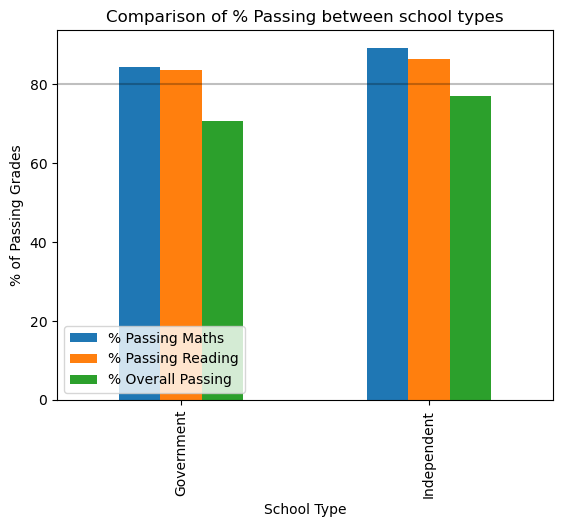

In [27]:
import matplotlib.pyplot as plt

type_summary_num = type_summary.astype({'Average Maths Score':'float',
                     'Average Reading Score':'float',
                     '% Passing Maths':'float',
                     '% Passing Reading':'float',
                     '% Overall Passing':'float'})

fig1 = type_summary_num[['% Passing Maths', '% Passing Reading', '% Overall Passing']].plot(kind='bar',title='Comparison of % Passing between school types')
fig1.set_xlabel('School Type')
fig1.set_ylabel('% of Passing Grades')
plt.legend(loc='lower left')
plt.hlines(80,-1,2,colors='black',alpha=0.25)
plt.show()

The horizontal line in the chart above is arbitrarily set at 80% and is only used to help visualise the differences between the Government schools and Independent schools data. It is clear that, _on average_, the Independent schools outscore the Government ones.

It would be interesting to spend more time on understanding the differences between these types of school in terms of (non-exhautive):
- funding
- number of students
- location and socio-economic factors
- quality of teaching

### 2.2 Correlation between school size and grades

Another interesting observation relates to an apparent correlation between the school size and the maths and reading grades. This is shown in the table below.

In [28]:
size_summary

,Average Maths Score,Average Reading Score,% Passing Maths,% Passing Reading,% Overall Passing
School Size,,,,,
Small (<1000),72.34,71.64,90.81,87.56,79.07
Medium (1000-2000),71.42,70.72,89.85,86.71,78.04
Large (2000-5000),69.75,69.58,84.25,83.30,70.29


It seems like across both disciplines, the larger the number of students in a school, the worse they perform. This is again shown in the chart below.

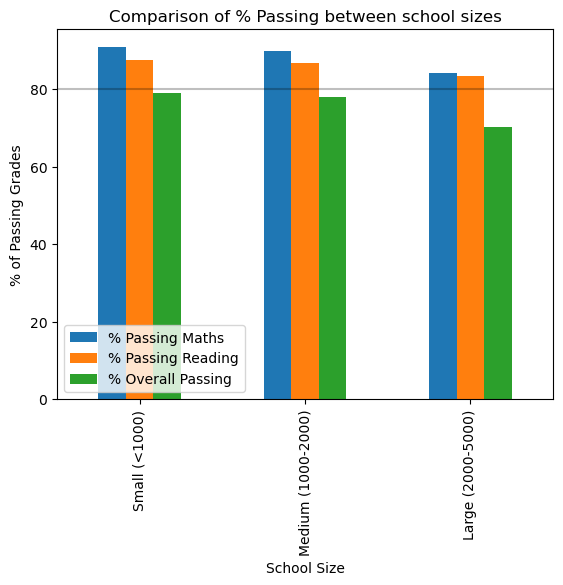

In [29]:
import matplotlib.pyplot as plt

size_summary_num = size_summary.astype({'Average Maths Score':'float',
                     'Average Reading Score':'float',
                     '% Passing Maths':'float',
                     '% Passing Reading':'float',
                     '% Overall Passing':'float'})

fig1 = size_summary_num[['% Passing Maths', '% Passing Reading', '% Overall Passing']].plot(kind='bar',title='Comparison of % Passing between school sizes')
fig1.set_xlabel('School Size')
fig1.set_ylabel('% of Passing Grades')
plt.legend(loc='lower left')
plt.hlines(80,-1,3,colors='black',alpha=0.25)
plt.show()

The horizontal line in the chart above is arbitrarily set at 80% and is only used to help visualise the differences between the three school sizes.

The correlation appears clear but no causation can be implied as other metrics can be at play. We can guess that the larger schools can pay less attention to each individual students if the classrooms are bigger (i.e. fewer teachers per number of students). Likewise, if the budget does not scale proportionally with the number of student, the overall performance of the cohort may decrease.

Regarding the budget, it is interesting to note that the amount spent per student does not correlate with the perforance as shown in the table below.

In [30]:
spending_summary

,Average Maths Score,Average Reading Score,% Passing Maths,% Passing Reading,% Overall Passing
Spending Ranges per Student,,,,,
<$585,71.36,70.72,88.84,86.39,76.72
$585-$630,72.07,71.03,91.52,87.29,79.88
$630-$645,69.85,69.84,84.69,83.76,71.00
$645-$680,68.88,69.05,81.57,81.77,66.76


On the contrary, the data seem to show that an optimal exists when between a per-student budget between $585 and $630 is set. We can make different hypothesis about this:
- spending less that $585 may not be as effective, suggesting that a minimum amount of funding is necessary to achieve a certain level of teaching quality
- spending more that $630 may lead to inefficiencies with more money thrown at a problem without addressing the root cause

These would require additional analysis and perhaps more data to be confirmed.

## Summary and future work

In this report we have analysed data from schools and looked at the correlation between different variables:
- maths and reading grades
- types of school: government and independent
- size of school, in terms of number of students
- budget
- etc.

We have used these data to try and evaluate the factors influencing the performance of the students, based on their average grades in maths and reading. We have found some interesting correlations between the passing grades, and the school types (independent schools seem to perform better), sizes (smaller schools seem to perform better) and budgets (spending more per student is not a guaranteed way to increase performance.)

The analysis performed is very preliminary but presents different opportunities to better understand the drivers behind student performance. Understanding key differences between gorvernment and independent schools can lead to improvement and some adjustment in the ways budgets are spent can lead to an increase in financial efficiency (measured by the passing % as a function of budget per student.)